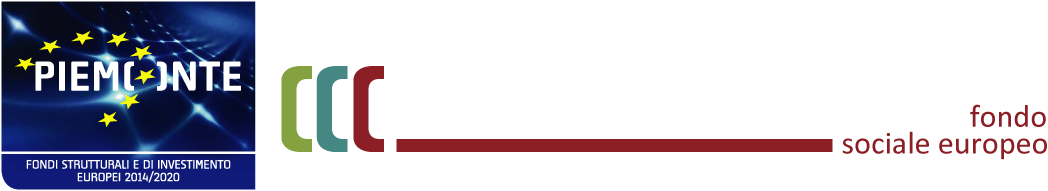





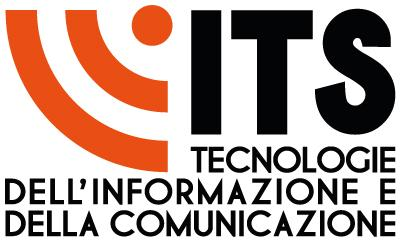




**Unità Formativa (UF):** AI e Machine Learning - Python

**Docente:** Fabio Giuseppe Antonio Gagliardi

**Titolo argomento:** esame di metà corso


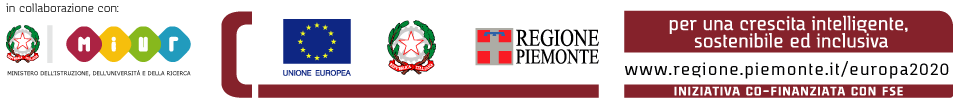



---



NOME:

\

COGNOME:



---



# **REGOLE ESAME**

* **Commentare i passaggi importanti. Nello specifico:**
  *  **a cosa serve un blocco di codice, una classe o una funzione**
  *  **motivare le scelte effettuate nel codice.**

  * **L'ASSENZA DI COMMENTI SARÀ VALUTATA NEGATIVAMENTE**
  * **LE PROVE CHE DOVESSERO RIPORTARE GLI STESSI COMMENTI E LO STESSO CODICE COPIATO SARANNO VALUTATE NEGATIVAMENTE**

  es.

```
# Ho creato una classe Foo per questo motivo ...
# Funzione per calcolare ...
# Ho optato per questa soluzione piuttosto che ....
```
\

* **È richiesta la stesura di una legenda in quei grafici in cui non è chiara l'associazione della rappresentazione scelta con il dato.**

\

* **Si è liberi di utilizzare qualisasi strumento per rispondere alle richieste.
  Tuttavia si chiede di ricopiare in queso Notebook le risposte.
  Tutti i punti devono essere eseguiti nei corrispettivi blocchi senza errori.
  File diversi da questo Notebook verranno scartati.**




---



# **Descrizione dei dati**

**Dataset:**
- importazioni in Italia dal 1985 al 2015
- esportazioni in Italia dal 1985 al 2015

**link**
- importazioni: https://raw.githubusercontent.com/FabioGagliardiIts/ai_ml_python/main/Esami/Esame_1/import.csv
- esportazioni: https://raw.githubusercontent.com/FabioGagliardiIts/ai_ml_python/main/Esami/Esame_1/export.csv

**fonte:** https://seriestoriche.istat.it/






# **Librerie**

Importare nel progetto le librerie necessarie allo svolgimento dell'esercizio.
  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Organizzazione e preparazione dei dati**


  Nel blocco di codice seguente andranno sviluppate tutte le strutture e le variabili globali da utlizzare nel resto del progetto.

  Viene lasciata totale libertà nell'organizzazione e nella preparazione dei dati. Qualsiasi cheet-sheet può essere usato come riferimento. 
  

  



In [3]:

class Dati:
  def __init__(self, csv_src: str):
    self.df = pd.read_csv(csv_src)
    self.df_aree    = self.df.loc[:, (self.df.columns != 'Italia') & (self.df.columns != 'ANNI')]
    self.anni       = self.df['ANNI']
    self.nord_ovest = self.df['Nord-ovest']
    self.nord_est   = self.df['Nord-est']
    self.centro     = self.df['Centro']
    self.sud        = self.df['Sud']
    self.isole      = self.df['Isole']
    self.rdns       = self.df['Regioni diverse e non  specificate']
    self.italia     = self.df['Italia']

  def display(self):
    display(self.df)


  def get_anno_row(self, anno: int):
      return self.df[self.df['ANNI'] == anno].loc[:, (self.df.columns != 'Italia') & (self.df.columns != 'ANNI')]


  def _get(self, anno: int, area:str) -> float:
      return float(self.df[self.df['ANNI'] == anno][area])

  def get_nord_ovest(self, anno: int) -> float:
      return float(self._get(anno, 'Nord-ovest'))

  def get_nord_est(self, anno: int) -> float:
      return float(self._get(anno, 'Nord-est'))

  def get_centro(self, anno: int) -> float:
     return float(self._get(anno, 'Centro'))   

  def get_sud(self, anno: int) -> float:
     return float(self._get(anno, 'Sud'))  

  def get_isole(self, anno: int) -> float:
     return float(self._get(anno, 'Isole'))    
 
  def get_rdns(self, anno: int) -> float:
     return float(self._get(anno, 'Regioni diverse e non  specificate'))     
 
  def get_italia(self, anno: int) -> float:
     return float(self._get(anno, 'Italia'))     


df_import = Dati("https://raw.githubusercontent.com/FabioGagliardiIts/ai_ml_python/main/Esami/Esame_1/import.csv")
df_export = Dati("https://raw.githubusercontent.com/FabioGagliardiIts/ai_ml_python/main/Esami/Esame_1/export.csv")


In [4]:
df_import.display()

,ANNI,Nord-ovest,Nord-est,Centro,Sud,Isole,Regioni diverse e non specificate,Italia
0,1985,39970708.0,15946307.0,13531696.0,7463001.0,9053634.0,3283159.0,89248505.0
1,1986,37387007.0,14690822.0,11714132.0,5652426.0,5123496.0,2381026.0,76948908.0
2,1987,41302411.0,15833399.0,13011272.0,6066023.0,5274510.0,2360679.0,83848295.0
3,1988,47089407.0,18414973.0,14515697.0,6174717.0,4534704.0,2239741.0,92969238.0
4,1989,54326465.0,21333113.0,17126515.0,7544372.0,5699858.0,2379180.0,108409502.0
5,1990,56060049.0,21993495.0,18774041.0,7350146.0,6405503.0,1851187.0,112434422.0
6,1991,57284919.0,23022878.0,19499709.0,8197942.0,6277735.0,2304753.0,116587935.0
7,1992,58767087.0,24266146.0,20220263.0,8563277.0,6048287.0,2010060.0,119875121.0
8,1993,60322789.0,24982665.0,18985264.0,8360840.0,6903197.0,775161.0,120329916.0
9,1994,71089336.0,29482292.0,22689769.0,9275919.0,7332567.0,803498.0,140673381.0


In [5]:
df_export.display()

,ANNI,Nord-ovest,Nord-est,Centro,Sud,Isole,Regioni diverse e non specificate,Italia
0,1985,33587519.0,19778107.0,12290675.0,5145710.0,3762907.0,2760872.0,77325790.0
1,1986,33085278.0,19494286.0,11751776.0,4855048.0,2556107.0,3314822.0,75057317.0
2,1987,34539685.0,20943789.0,12269792.0,4955274.0,2499260.0,2714727.0,77922526.0
3,1988,41006708.0,23880594.0,12676743.0,5267624.0,2525650.0,570815.0,85928134.0
4,1989,47142723.0,26828323.0,15178560.0,5931589.0,2866016.0,1624211.0,99571422.0
5,1990,49327634.0,28895192.0,15727223.0,6315543.0,3119767.0,1721513.0,105106873.0
6,1991,50000665.0,29695069.0,16039731.0,6614243.0,3066509.0,2899418.0,108315636.0
7,1992,53174259.0,31515971.0,16964438.0,6844225.0,3034274.0,1796179.0,113329345.0
8,1993,62393832.0,40710807.0,21805112.0,8572659.0,3200968.0,804908.0,137488285.0
9,1994,72165434.0,47592218.0,25308158.0,10407886.0,3442430.0,176166.0,159092292.0


# **Richiesta 1**

* Visualizzazione dell'andamento delle importazioni per aree geografiche dal 1985 al 2015. 
Visualizzare tutte le aree in un unico layout in modo da poterle confrontare graficamente.
 
* Visualizzazione dell'andamento delle esportazioni per aree geografiche dal 1985 al 2015.
Visualizzare tutte le aree in un unico layout in modo da poterle confrontare graficamente.



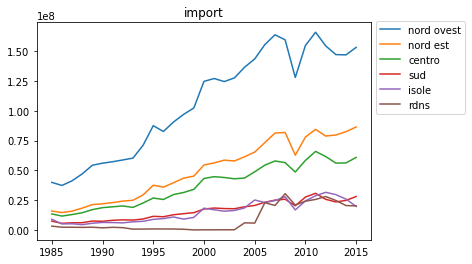

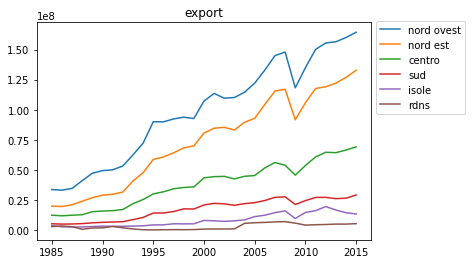

In [6]:
def plot_data_trends_1985_2015(dati: Dati, title: str):
  plt.plot(dati.anni, dati.nord_ovest, label='nord ovest')
  plt.plot(dati.anni, dati.nord_est, label='nord est')
  plt.plot(dati.anni, dati.centro, label='centro')
  plt.plot(dati.anni, dati.sud, label='sud')
  plt.plot(dati.anni, dati.isole, label='isole')
  plt.plot(dati.anni, dati.rdns, label='rdns')
  plt.legend(bbox_to_anchor=(1., 1.03))
  plt.title(title)
  plt.show()


plot_data_trends_1985_2015(df_import, "import")  
plot_data_trends_1985_2015(df_export, "export")  

# **Richiesta 2**
* selezionare i dati relativi all'anno 2015 e visualizzare le percentuali per aree geografiche

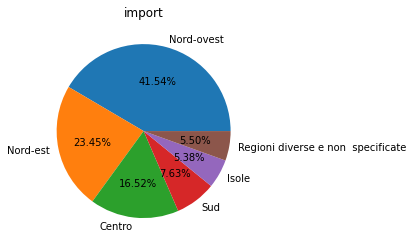

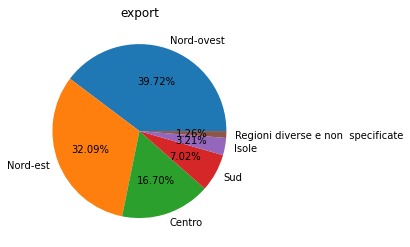

In [7]:


def data_pie_2015(data: Dati, title: str):
  nord_ovest = data.get_nord_ovest(2015)
  nord_est   = data.get_nord_est(2015)
  centro     = data.get_centro(2015)
  sud        = data.get_sud(2015)
  isole      = data.get_isole(2015)
  rdns       = data.get_rdns(2015)
  italia     = data.get_italia(2015)

  
  #somma =  nord_ovest + nord_est + centro + sud + isole + rdns
  #print(italia, somma)

  areas  = data.df_aree.columns.values

  pie_values = [nord_ovest / italia, 
                  nord_est / italia, 
                  centro / italia, 
                  sud / italia, 
                  isole/ italia, 
                  rdns / italia] 

  plt.pie(pie_values,  labels = areas,autopct="%0.2f%%")
  plt.title(title)
  plt.show()


data_pie_2015(df_import, "import")
data_pie_2015(df_export, "export")


# **Richiesta 3**
* Calcolare la media per le importazioni dal 1985 al 2015
* Calcolare la media per le esportazioni dal 1985 al 2015


**soluzione 1 (per regioni)**

In [8]:
def get_means_areas(data: Dati) -> np.array:
  means_areas = np.zeros(6)
  for (index, colname) in enumerate(data.df_aree):
      means_areas[index]  = data.df_aree[colname].values.mean()
  return means_areas

imp_means_areas = get_means_areas(df_import)
exp_means_areas = get_means_areas(df_export)


**soluzione 2 (per anni)**

In [9]:

def get_means_array(data: Dati) -> np.array:
  means_years = np.zeros_like(data.italia.to_numpy())

  for index, row in data.df_aree.iterrows():
    means_years[index] = row.mean()

  return means_years


imp_means_years = get_means_array(df_import)
exp_means_years = get_means_array(df_export)


# **Richiesta 4**
* Visualizzare quantitativamente il confronto tra la media delle importazioni e delle esportazioni dal 1985 al 2015


**soluzione 1**

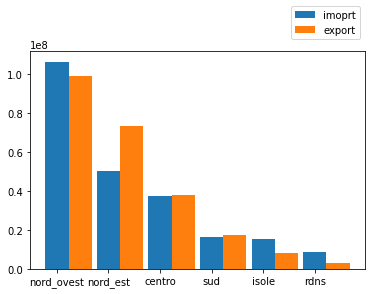

In [10]:
areas = [
  "nord_ovest", 
  "nord_est",   
  "centro",   
  "sud",       
  "isole",     
  "rdns"]  

plt.bar(areas, imp_means_areas, 0.45, label="imoprt")
plt.bar(np.arange(6)+0.45, exp_means_areas, 0.45, label="export")
plt.legend(bbox_to_anchor=(1., 1.23))
plt.show()


**soluzione 2**

61452555.5


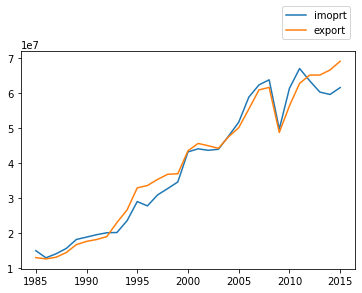

In [11]:
anni = df_import.anni


plt.plot(anni, imp_means_years, label="imoprt")
plt.plot(anni, exp_means_years, label="export")
plt.legend(bbox_to_anchor=(1., 1.23))
plt.show()

# **Richiesta 5**

* Visualizzare la relazione tra import ed export in Itlaia
* Calcolare il coefficiente di correlazione tra imoprt ed export in Italia



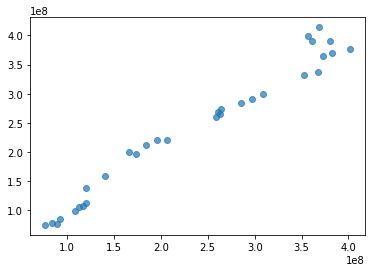

In [12]:
plt.scatter(df_import.italia, df_export.italia, alpha=0.7)
plt.show()

In [13]:

def correlazione(x: np.array, mu_x: float, y: np.array, mu_y: float) -> float:
  cov = np.sum((x - mu_x) * (y - mu_y))
  return (cov / np.sqrt( np.sum(np.power(x - mu_x, 2)) * np.sum(np.power(y - mu_y, 2)) ))


ita_import = df_import.italia.to_numpy()
ita_export = df_export.italia.to_numpy()
corr_1 = correlazione(ita_import, ita_import.mean(), ita_export, ita_export.mean())

print(corr_1)

0.9852562889246547


In [14]:
corr_2 = np.corrcoef(df_import.italia.to_numpy(), df_export.italia.to_numpy())
print(corr_2)

[[1.         0.98525629]
 [0.98525629 1.        ]]


# **Richiesta 6**

* Dividere i dati delle importazioni e delle esportazioni in intervalli di massimo cinque anni.
* Calcolare le medie (import ed export) per ogni intervallo e solo per i dati reltivi all'Italia.
* Visualizzare l'andamento di import ed export relativo alle medie (media mobile).

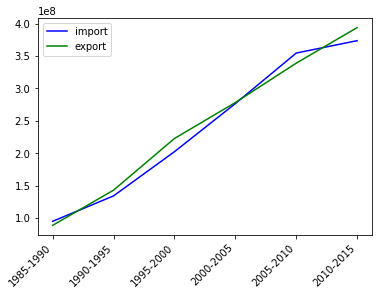

In [15]:



def plot_r6(data: Dati, color: str, label: str):
  mask_1 = (data.anni > 1985)  & (data.anni  <= 1990)
  mask_2 = (data.anni > 1990)  & (data.anni  <= 1995)
  mask_3 = (data.anni > 1995)  & (data.anni  <= 2000)
  mask_4 = (data.anni > 2000)  & (data.anni  <= 2005)
  mask_5 = (data.anni > 2005)  & (data.anni  <= 2010)
  mask_6 = (data.anni > 2010)  & (data.anni  <= 2015)

  ita = np.zeros(6)
  ita[0] = data.italia[mask_1].mean()
  ita[1] = data.italia[mask_2].mean()
  ita[2] = data.italia[mask_3].mean()
  ita[3] = data.italia[mask_4].mean()
  ita[4] = data.italia[mask_5].mean()
  ita[5] = data.italia[mask_6].mean()

  years = (["1985-1990","1990-1995","1995-2000","2000-2005","2005-2010", "2010-2015"])

  plt.plot(years, ita, color=color, label=label)
  plt.xticks(rotation=45, ha='right')
  plt.legend()


plot_r6(df_import, 'blue', "import")
plot_r6(df_export, 'green', 'export')
plt.show()
